# Tutorial 3 Solution
# Decision Trees

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

## Loading Data
### The data file diabetes.csv is available on Moodle
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [2]:
# Define the labels for the disbeties datafile
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("diabetes.csv", header = 0, names = col_names)
# change the path of C drive where you have downsloaded your "pima-indians-diabetes.csv"

In [3]:
# Display the first 5 records
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check missing/ null values in variables
pima.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

## Feature Selection

In [5]:
# split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]               # Features of the dataset
y = pima.label                       # Target variable of the dataset

# Display the X and y arrays
print(X, y)

     pregnant  insulin   bmi  age  glucose  bp  pedigree
0           6        0  33.6   50      148  72     0.627
1           1        0  26.6   31       85  66     0.351
2           8        0  23.3   32      183  64     0.672
3           1       94  28.1   21       89  66     0.167
4           0      168  43.1   33      137  40     2.288
..        ...      ...   ...  ...      ...  ..       ...
763        10      180  32.9   63      101  76     0.171
764         2        0  36.8   27      122  70     0.340
765         5      112  26.2   30      121  72     0.245
766         1        0  30.1   47      126  60     0.349
767         1        0  30.4   23       93  70     0.315

[768 rows x 7 columns] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64


## Splitting Data

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) # 70% training and 30% test

## Building Decision Tree Model

In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluating Model

In [8]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.7575757575757576
Accuracy: 0.76


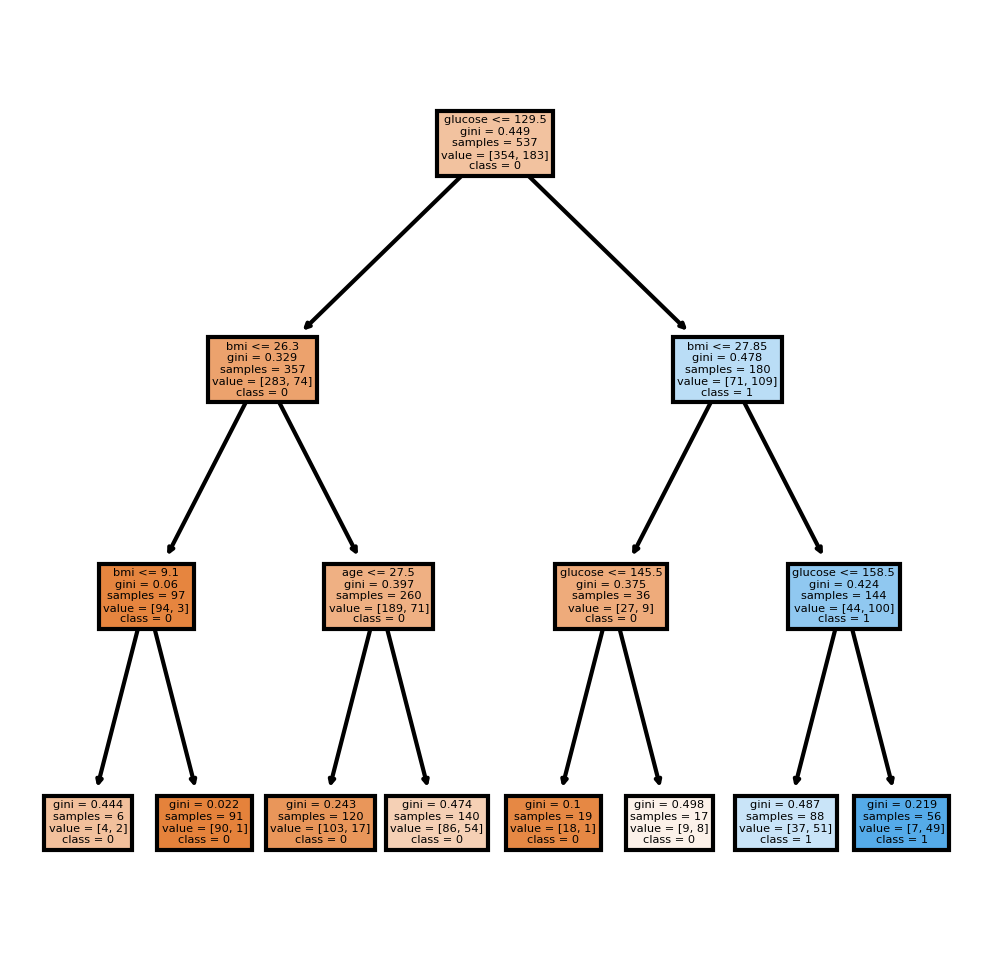

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# column names for dataset
fn=['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
# classes of dataset
cn=['0','1']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = fn, 
           class_names = cn,
           filled = True);
# In case of any errors, install conda install python-graphviz     on the command line

## Optimizing Decision Tree Performance
### criterion : optional (default=”gini”)
Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

## splitter : string, optional (default=”best”) or Split Strategy:¶
This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

## max_depth : int or None, optional (default=None) or Maximum Depth of a Tree:
The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


# Task
### Apply the DecisionTree algorithm for the dataset "User_Data.csv" and display the results using confusion matrix.

In [11]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
#importing datasets  
data_set= pd.read_csv('User_Data.csv')  
  
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [12]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  

classifier = DecisionTreeClassifier(max_depth = 3, criterion = 'gini', random_state = 0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(max_depth=3, random_state=0)

In [13]:
#Predicting the test set result  
y_pred = classifier.predict(x_test)  

y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [14]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

cm

array([[64,  4],
       [ 2, 30]], dtype=int64)

In the above output image, we can see the confusion matrix, which has 6+3= 9 incorrect predictions and62+29=91 correct predictions. Therefore, we can say that compared to other classification models, the Decision Tree classifier made a good prediction.

In [15]:
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.94
Accuracy: 0.94


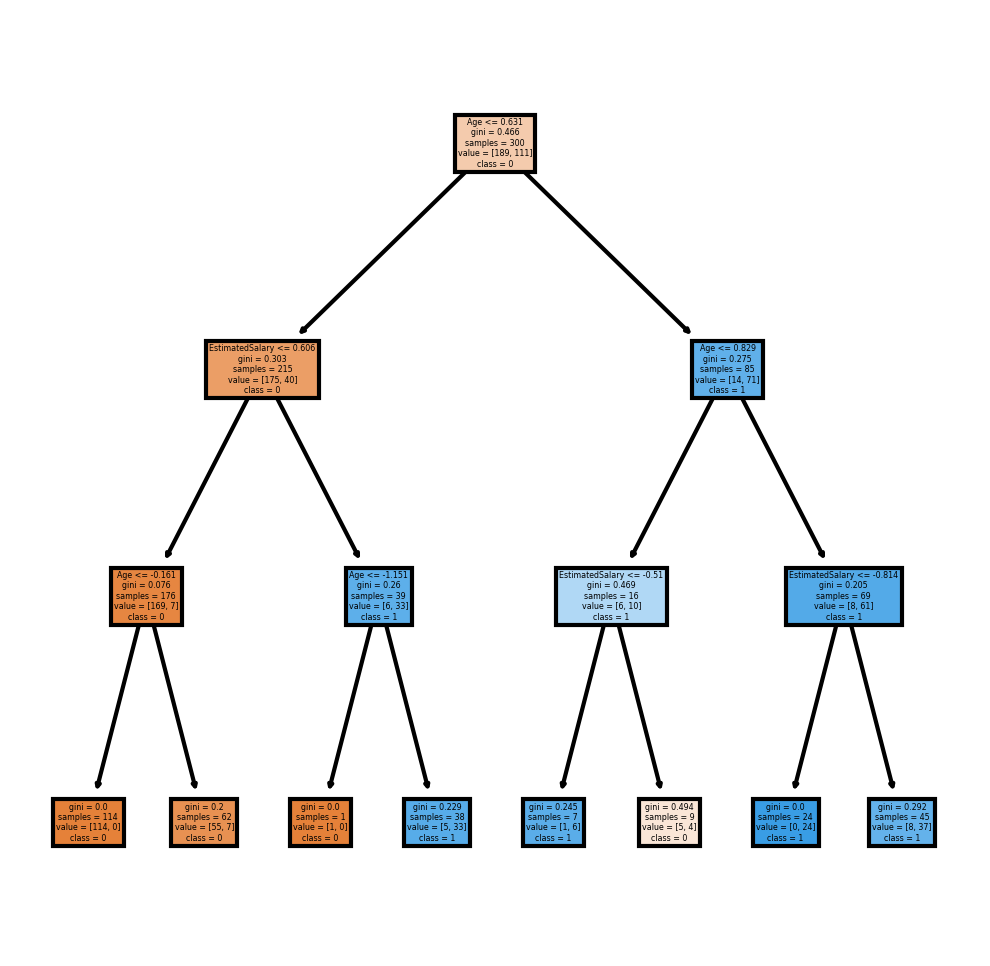

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# column names for dataset
#User ID,Gender,Age,EstimatedSalary,Purchased
fn=['Age', 'EstimatedSalary']
# classes of dataset
cn=['0','1']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(classifier,
           feature_names = fn, 
           class_names = cn,
           filled = True);
# In case of any errors, install conda install python-graphviz     on the command line

## Reference: 
1. <p>https://www.datacamp.com/community/tutorials/random-forests-classifier-python</p>
2. <p>https://www.datacamp.com/community/tutorials/decision-tree-classification-python</p>
3. <p>https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm</p>